# Character Recognition Model

In [1]:
import tensorflow as tf

In [3]:
import pandas as pd

In [2]:
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [4]:
import tensorflowjs as tfjs

Load in Data

In [285]:
def df_processing(input_set):
    features = input_set.copy()
    labels = features.pop(features.columns[784])
    
    #one hot non 0 feature values to 1
    #and make them floats
    feature_col_names = list(features.columns.values)
    features[feature_col_names] = features.where(features[feature_col_names] > 180, 0).astype('float32')
    features[feature_col_names] = features.where(features[feature_col_names] <= 180, 1).astype('float32')

    output_tensor = tf.data.Dataset.from_tensor_slices((features, labels))
    
    return output_tensor

In [188]:
test = train_set.head(10)

In [189]:
test_2 = df_processing(test)

In [277]:
train_set = pd.read_csv('../Data/emnist-letters-train.csv')

In [280]:
flip_train_set = train_set[train_set.columns[::-1]]

In [286]:
flip_train_tensor = df_processing(flip_train_set)

In [226]:
train_tensor = df_processing(train_set)

In [288]:
#check if the tensor worked
for feat, targ in flip_train_tensor.take(1):
    print('Features: {}, Target: {}'.format(feat, targ))
    print(targ)

Features: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1.
 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0

In [228]:
#shuffle and batch
train_tensor_shuffle_batch = train_tensor.shuffle(len(train_set)).batch(15)

Model

In [229]:
def get_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(100, activation = 'relu'),
        tf.keras.layers.Dense(50, activation = 'relu'),
        tf.keras.layers.Dense(27) #outputs [0, 27)
    ])

    model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['sparse_categorical_accuracy'])
    
    return model

In [230]:
letter_model = get_model()

In [231]:
letter_model.fit(train_tensor_shuffle_batch, epochs = 10)

Epoch 1/10
5920/5920 [==============================] - 23s 4ms/step - loss: 0.8569 - sparse_categorical_accuracy: 0.7438
Epoch 2/10
5920/5920 [==============================] - 14s 2ms/step - loss: 0.4865 - sparse_categorical_accuracy: 0.8486
Epoch 3/10
5920/5920 [==============================] - 18s 3ms/step - loss: 0.4000 - sparse_categorical_accuracy: 0.8715
Epoch 4/10
5920/5920 [==============================] - 12s 2ms/step - loss: 0.3485 - sparse_categorical_accuracy: 0.8858
Epoch 5/10
5920/5920 [==============================] - 18s 3ms/step - loss: 0.3128 - sparse_categorical_accuracy: 0.8972
Epoch 6/10
5920/5920 [==============================] - 19s 3ms/step - loss: 0.2828 - sparse_categorical_accuracy: 0.9050
Epoch 7/10
5920/5920 [==============================] - 15s 2ms/step - loss: 0.2614 - sparse_categorical_accuracy: 0.9111
Epoch 8/10
5920/5920 [==============================] - 15s 2ms/step - loss: 0.2440 - sparse_categorical_accuracy: 0.9157
Epoch 9/10
5920/5920 [==

In [293]:
one = flip_train_tensor.take(5)

In [221]:
for 

[<tf.Tensor: shape=(), dtype=int64, numpy=7>, <tf.Tensor: shape=(), dtype=int64, numpy=16>, <tf.Tensor: shape=(), dtype=int64, numpy=15>, <tf.Tensor: shape=(), dtype=int64, numpy=23>, <tf.Tensor: shape=(), dtype=int64, numpy=17>, <tf.Tensor: shape=(), dtype=int64, numpy=13>, <tf.Tensor: shape=(), dtype=int64, numpy=11>, <tf.Tensor: shape=(), dtype=int64, numpy=22>, <tf.Tensor: shape=(), dtype=int64, numpy=24>, <tf.Tensor: shape=(), dtype=int64, numpy=10>]


In [294]:
onef = []
ans = []

for feat, targ in one:
    ans.append(targ)
    onef.append(feat)

In [295]:
onefr = []
for i in onef:
    onefr.append(tf.reshape(i,[28,28]))

In [254]:
testa = [0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 1 , 1 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 1 , 1 , 1 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 1 , 1 , 1 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 1 , 1 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 1 , 1 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 1 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 1 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 1 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 1 , 1 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 1 , 1 , 1 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 1 , 1 , 0 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 1 , 1 , 1 , 0 , 1 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 1 , 1 , 0 , 0 , 1 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 1 , 1 , 0 , 0 , 0 , 0 , 1 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 1 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 1 , 1 , 1 , 0 , 0 , 1 , 1 , 1 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 1 , 1 , 1 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0]

In [256]:
testatf = tf.convert_to_tensor(testa)
testatf2 = tf.convert_to_tensor(testa)

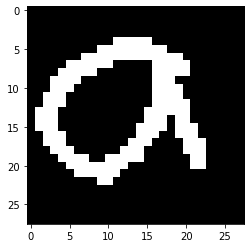

In [262]:
testatf = tf.reshape(testatf,[28,28])

pyplot.imshow(testatf, cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [257]:
letter_model.predict(tf.reshape(testatf2,(-1,784)))

array([[-49.890606  ,   3.8656478 , -10.022511  ,  -3.9307787 ,
        -14.448726  ,  -1.0204133 ,   0.30798042,   3.3701172 ,
        -17.638884  , -20.150677  , -11.157328  , -16.558176  ,
        -23.485235  , -31.41971   , -20.910686  , -15.5415325 ,
         -3.06201   ,   8.252828  ,   0.6418629 ,  -5.698486  ,
        -16.114475  , -17.694054  , -19.311432  , -26.883127  ,
        -18.23251   , -13.29187   ,  -2.5591848 ]], dtype=float32)

In [146]:
from matplotlib import pyplot
import time

In [162]:
ans

[<tf.Tensor: shape=(), dtype=int64, numpy=7>,
 <tf.Tensor: shape=(), dtype=int64, numpy=16>,
 <tf.Tensor: shape=(), dtype=int64, numpy=15>,
 <tf.Tensor: shape=(), dtype=int64, numpy=23>,
 <tf.Tensor: shape=(), dtype=int64, numpy=17>,
 <tf.Tensor: shape=(), dtype=int64, numpy=13>,
 <tf.Tensor: shape=(), dtype=int64, numpy=11>,
 <tf.Tensor: shape=(), dtype=int64, numpy=22>,
 <tf.Tensor: shape=(), dtype=int64, numpy=24>,
 <tf.Tensor: shape=(), dtype=int64, numpy=10>]

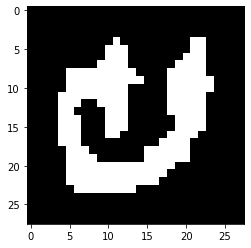

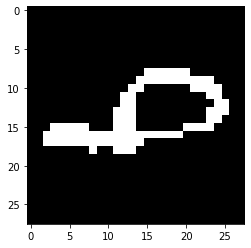

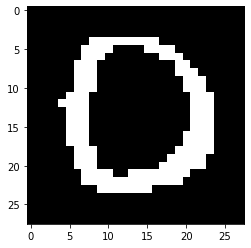

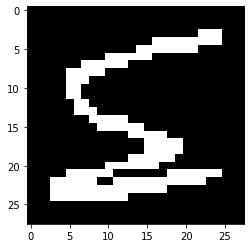

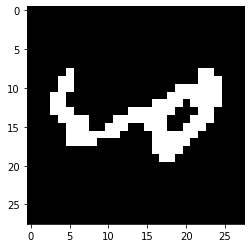

In [296]:
for i in onefr:
    pyplot.imshow(i, cmap=pyplot.get_cmap('gray'))
    pyplot.show()

In [76]:
orig = train_set.iloc[0]

In [85]:
import numpy as np

In [88]:
orig2 = orig.iloc[1:]
reshaped = orig2.to_numpy()
reshaped = np.reshape(reshaped,[28,28])

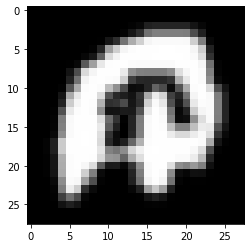

In [89]:
pyplot.imshow(reshaped, cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [297]:
letter_model.predict(feat[0])

IndexError: list index out of range

Save the Model

In [241]:
#convert keras to tf model and export it
tfjs.converters.save_keras_model(letter_model, "../model")